In [32]:
import pandas as pd
import numpy as np 
import matplotlib as plt 

tweets = pd.read_csv('combined.csv', encoding='utf-8')
tweets.head(5)

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-05-08T08:19:09,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL,"{""Neutral"":0.7228581905364990234375,""Negative""..."
1,2018-07-02T19:28:00.331000,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL,"{""Neutral"":0.998256266117095947265625,""Negativ..."
2,2018-09-05T12:54:20.408000,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL,"{""Neutral"":0.912796199321746826171875,""Negativ..."
3,2018-05-08T10:42:17,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE,"{""Neutral"":0.3271420896053314208984375,""Negati..."
4,2018-08-07T07:29:59.136000,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL,"{""Neutral"":0.957906246185302734375,""Negative"":..."


In [33]:
tweets = tweets.drop(['tweet_date_created'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,language,sentiment,sentiment_score
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL,"{""Neutral"":0.7228581905364990234375,""Negative""..."
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL,"{""Neutral"":0.998256266117095947265625,""Negativ..."
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL,"{""Neutral"":0.912796199321746826171875,""Negativ..."
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE,"{""Neutral"":0.3271420896053314208984375,""Negati..."
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL,"{""Neutral"":0.957906246185302734375,""Negative"":..."


In [34]:
duplicates = tweets[tweets.duplicated(subset=['tweet_id'], keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate tweet ids. Removing duplicates...")
    tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
else:
    print("No duplicate tweet ids found.")

Found 762643 duplicate tweet ids. Removing duplicates...


In [4]:
tweets = tweets.drop(['sentiment_score'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,language,sentiment
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL


In [5]:
tweets = tweets.dropna()
print(tweets.isnull().sum())

tweet_id      0
tweet_text    0
language      0
sentiment     0
dtype: int64


In [6]:
all_english = (tweets['language'] == 'en').all()


if all_english:
    print("All values in the 'language' column are 'en'")
else:
    print("Not all values in the 'language' column are 'en'")

All values in the 'language' column are 'en'


In [7]:
tweets = tweets.drop(['language'], axis=1)
tweets.head(5)

,tweet_id,tweet_text,sentiment
0,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL
1,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL
2,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,NEUTRAL
3,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE
4,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL


In [8]:
tweets = tweets.drop(['tweet_id'], axis=1)
tweets.head(5)

,tweet_text,sentiment
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL
1,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL
2,@ChelseaFC Don't make him regret it and start ...,NEUTRAL
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE
4,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL


In [9]:
# Get all unique sentiment values in the 'sentiment' column
unique_sentiments = tweets['sentiment'].unique()

# Print the unique sentiment values
print("Unique sentiment values in the 'sentiment' column:")
for sentiment in unique_sentiments:
    print(sentiment)

Unique sentiment values in the 'sentiment' column:
NEUTRAL
NEGATIVE
POSITIVE
MIXED


In [10]:
# Define a dictionary that maps sentiment labels to numeric values
sentiment_map = {"NEUTRAL": 0, "POSITIVE": 1, "MIXED": 2, "NEGATIVE": -1}

# Map the sentiment labels to their numeric values
tweets['sentiment_values'] = tweets['sentiment'].map(sentiment_map)

# Print the new column that contains the mapped values
print(tweets['sentiment_values'])

0          0
1          0
2          0
3         -1
4          0
          ..
5393957    0
5393958   -1
5393959    0
5393960    0
5393961    0
Name: sentiment_values, Length: 5012534, dtype: int64


In [11]:
tweets.head(5)

,tweet_text,sentiment,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,NEUTRAL,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,NEUTRAL,0
2,@ChelseaFC Don't make him regret it and start ...,NEUTRAL,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",NEGATIVE,-1
4,@theesk @Everton Didn't realise Kenwright is d...,NEUTRAL,0


In [11]:
tweets = tweets.drop(['sentiment'], axis=1)
tweets.head(5)

,tweet_text,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,0
2,@ChelseaFC Don't make him regret it and start ...,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",-1
4,@theesk @Everton Didn't realise Kenwright is d...,0


In [12]:
tweets['sentiment_values']=tweets['sentiment_values'].replace(-1, 3)
tweets.head(5)

,tweet_text,sentiment_values
0,Bayer Leverkusen goalkeeper Bernd Leno will no...,0
1,Gary Speed v Blackburn at St James in 2001/02 ...,0
2,@ChelseaFC Don't make him regret it and start ...,0
3,"@LiverpoolFF @AnfieldEdition He's a liar, made...",3
4,@theesk @Everton Didn't realise Kenwright is d...,0


In [13]:
# Find the indices of rows with Mixed sentiment
mixed_indices = tweets[tweets['sentiment_values'] == 2].index

# Delete the rows with Mixed sentiment
tweets = tweets.drop(mixed_indices)

# Print the resulting DataFrame
print(tweets.head())

                                          tweet_text  sentiment_values
0  Bayer Leverkusen goalkeeper Bernd Leno will no...                 0
1  Gary Speed v Blackburn at St James in 2001/02 ...                 0
2  @ChelseaFC Don't make him regret it and start ...                 0
3  @LiverpoolFF @AnfieldEdition He's a liar, made...                 3
4  @theesk @Everton Didn't realise Kenwright is d...                 0


In [14]:
positive_tweets = tweets[tweets['sentiment_values'] == 1]
negative_tweets = tweets[tweets['sentiment_values'] == 3]
neutral_tweets = tweets[tweets['sentiment_values'] == 0]
mixed_tweets = tweets[tweets['sentiment_values'] == 2]

print('No of positive tagged tweets is: {}'.format(len(positive_tweets)))
print('No of negative tagged tweets is: {}'.format(len(negative_tweets)))
print('No of neutral tagged tweets is: {}'.format(len(neutral_tweets)))
print('No of mixed tagged tweets is: {}'.format(len(mixed_tweets)))

No of positive tagged tweets is: 1070334
No of negative tagged tweets is: 354501
No of neutral tagged tweets is: 3549918
No of mixed tagged tweets is: 0


In [15]:
import pandas as pd

# Shuffle the DataFrame to ensure that the downsampling is random
tweets = tweets.sample(frac=1, random_state=42)

# Count the number of tweets in each sentiment class
counts = tweets['sentiment_values'].value_counts()

# Find the smallest class size
smallest_size = counts.min()

# Downsample each class to the smallest size
positive_tweets = tweets[tweets['sentiment_values'] == 1].sample(n=smallest_size, random_state=42)
negative_tweets = tweets[tweets['sentiment_values'] == 3].sample(n=smallest_size, random_state=42)
neutral_tweets = tweets[tweets['sentiment_values'] == 0].sample(n=smallest_size, random_state=42)

# Concatenate the downsampled DataFrames
tweets = pd.concat([positive_tweets, negative_tweets, neutral_tweets], ignore_index=True)

# Print the new counts of tweets in each class
print('No of positive tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 1])))
print('No of negative tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 3])))
print('No of neutral tagged tweets is: {}'.format(len(tweets[tweets['sentiment_values'] == 0])))


No of positive tagged tweets is: 354501
No of negative tagged tweets is: 354501
No of neutral tagged tweets is: 354501


In [16]:
tweets['tweet_text'] = tweets['tweet_text'].astype('str')

In [17]:
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopword = set(stopwords.words('english'))

In [18]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'

def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]

    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [20]:
def convert_abbrev_in_text(tweets):
    t = []
    words = tweets.split() 
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]

In [21]:
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove whitespace
    text = text.strip()
    # Tokenize the text
    text = word_tokenize(text)
    # Remove stopwords
    text = set(stopwords.words('english'))
    return text

In [22]:
import pandas as pd
from sklearn.utils import shuffle

# Apply the preprocessing function to the 'text' column
tweets['processed_text'] = tweets['tweet_text'].apply(preprocess_text)

tweets =  shuffle(tweets).reset_index(drop=True)

In [23]:
tokenized_tweet=tweets['processed_text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['processed_text'].values.astype('U'))

tweets.head(5)

,tweet_text,sentiment_values,processed_text
0,Its an absolute disgrace @Arsenal that this m...,3,its an absolute disgrace that this man is all...
1,Think can believe Jorgensen is decent .@premie...,0,think can believe jorgensen is decent standar...
2,@refmillerafc @CheckatradeTrpy @Arsenal Can't ...,3,cant wait tbh mate shame we didnt get a nice l...
3,@DanielPoynter9 @LFC Not judging at all! I hop...,1,not judging at all i hope it was out of passio...
4,@BBCMOTD Best game: France - Argentina 4-3\n\n...,0,best game france argentina 43\n\nbest goal be...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import nltk
import dill

In [25]:
# Split the dataset into input (X) and output (y)
X = tweets['processed_text'].values
y = tweets['sentiment_values'].values

# Split the dataset into 70% training and 30% combined validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary dataset (30% of the entire dataset) into 50% validation and 50% testing
# This results in 15% validation and 15% testing of the entire dataset
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data size:", len(X_train))
print("Validation data size:", len(X_val))
print("Testing data size:", len(X_test))

Training data size: 744452
Validation data size: 159525
Testing data size: 159526


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill

text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=None, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.1))
])

params = {
    'vect__ngram_range': [(1,1), (1,2), (2,2), (1,3)],
    'vect__max_features': [1000, 5000, 10000, None],
    'clf__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
}

grid_search = GridSearchCV(text_clf, params, cv=5, n_jobs=1, scoring='accuracy')
 
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train.tolist(), y_train)

y_pred = best_clf.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))


Mean accuracy: 0.6894 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.6659 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.5242 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.6627 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7291 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.7123 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.6033 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.7072 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7300 | Hyperparameters: {'clf__

Confusion Matrix:
        0      1      3
0  29701  10563  12955
1   5604  42555   4973
3   4602   2715  45858


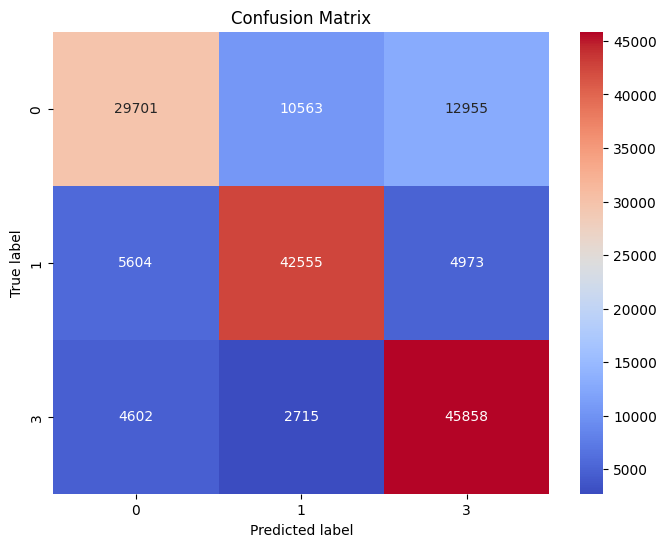

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a DataFrame
labels = sorted(set(y_test))
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n", cm_df)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill


text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

params = {
    'tfidf__max_features': [None, 5000, 10000],
    'clf__alpha': [0.1, 0.5, 1.0, 10.0],
    'tfidf__min_df': [1, 2],
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (2,2)],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'clf__fit_prior': [True, False]
}

grid_search = GridSearchCV(text_clf, params, cv=10, n_jobs=1, scoring='accuracy')
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train.tolist(), y_train)

y_pred = best_clf.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import dill

text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=None, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.1))
])

params = {
    'vect__ngram_range': [(1,1), (1,2), (2,2), (1,3)],
    'vect__max_features': [1000, 5000, 10000, None],
    'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(text_clf, params, cv=5, n_jobs=1)
 
grid_search.fit(X_train.tolist(), y_train)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.4f}".format(accuracy))


Mean accuracy: 0.6899 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.6664 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.5251 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.6630 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 1000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7328 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}
Mean accuracy: 0.7155 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 2)}
Mean accuracy: 0.6061 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (2, 2)}
Mean accuracy: 0.7104 | Hyperparameters: {'clf__alpha': 0.01, 'vect__max_features': 5000, 'vect__ngram_range': (1, 3)}
Mean accuracy: 0.7391 | Hyperparameters: {'clf__

Best accuracy model to test on 80% training

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# import string
# import nltk
# import dill

# # Define the pipeline with given parameters
# text_clf = Pipeline([
#     ('vect', CountVectorizer(ngram_range=(1, 2), max_features=None)), 
#     ('tfidf', TfidfTransformer(norm='l1', use_idf=True)), 
#     ('clf', MultinomialNB(alpha=0.1))
# ])

# text_clf.fit(X_train, y_train)

# # Evaluate the classifier on the test set
# y_pred = text_clf.predict(X_test.tolist())
# accuracy = accuracy_score(y_test, y_pred)

# # Print the classification report
# print(classification_report(y_test, y_pred))


In [ ]:
# print("Accuracy: {:.4f}".format(accuracy))

Tri-grams Hyper-Parameter Tuning

In [27]:
from numba import jit, cuda
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from scipy.stats import uniform
import nltk
import dill

# Define the pipeline 
text_clf = Pipeline([
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('clf', MultinomialNB())
])

# Define the hyperparameters for GridSearchCV
params = {
    'vect__ngram_range': [(1,1), (1,2), (1,3), (2,2)],
    'vect__max_features': [1000, 5000, 10000, None],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(text_clf, params, cv=10, n_jobs=1, scoring='accuracy')
grid_search.fit(X_val.tolist(), y_val)

# Print the mean test scores and corresponding hyperparameter combinations
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

print("Best parameters: ", grid_search.best_params_)

# Train the classifier with the best hyperparameters
best_params = grid_search.best_params_

# Train the classifier with the best hyperparameters
text_clf1 = Pipeline([
    ('vect', CountVectorizer(ngram_range=best_params['vect__ngram_range'], max_features=best_params['vect__max_features'])), 
    ('tfidf', TfidfTransformer(use_idf=best_params['tfidf__use_idf'], norm=best_params['tfidf__norm'])),
    ('clf', MultinomialNB(alpha=best_params['clf__alpha']))
])

text_clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Evaluate the classifier on the test set
y_pred = text_clf1.predict(X_test.tolist())
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

Original Final Hyper-Parameter Model

In [26]:
# from numba import jit, cuda
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# import string
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# import nltk
# import dill

# # Define the pipeline 
# text_clf = Pipeline([
#     ('vect', CountVectorizer()), # This step converts the collection of text into a matrix of token counts. It creates a vocabulary of all the unique words in the corpus and assigns a numerical value to each word.
#     ('tfidf', TfidfTransformer()), # This step converts the raw term frequency matrix generated by CountVectorizer into a normalized term frequency-inverse document frequency (TF-IDF) representation.
#     ('clf', MultinomialNB())
# ])

# # Define the hyperparameters for RandomizedSearchCV
# params = {
#     'vect__ngram_range': [(1,1), (1,2), (1,3), (2,2)],
#     'vect__max_features': [1000, 5000, 10000, None],
#     'tfidf__use_idf': [True, False],
#     'tfidf__norm': ['l1', 'l2'],
#     'clf__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
# }

# # # Perform randomized search to find the best hyperparameters
# # random_search = RandomizedSearchCV(text_clf, params, cv=5, n_iter=50, n_jobs=1, random_state=19)
# # random_search.fit(X_train.tolist(), y_train)

# random_search2 = RandomizedSearchCV(text_clf, params, cv=10, n_iter=10, n_jobs=1, random_state=42)  # Change random_state
# random_search2.fit(X_train.tolist(), y_train)

# # Print the mean test scores and corresponding hyperparameter combinations
# for mean_score, params in zip(random_search2.cv_results_['mean_test_score'], random_search2.cv_results_['params']):
#     print("Mean accuracy: {:.4f} | Hyperparameters: {}".format(mean_score, params))

# print("Best parameters: ", random_search2.best_params_)

KeyboardInterrupt: 

In [ ]:
# from numba import jit, cuda
# import spacy
# import numpy as np
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.naive_bayes import MultinomialNB

# nlp = spacy.load('en_core_web_sm')

# # Define the set of best parameters
# best_params = {'vect__ngram_range': (1,2), 'vect__max_features': None, 'tfidf__use_idf': True, 'tfidf__norm': 'l1', 'clf__alpha': 1.0}

# # Define a custom transformer for part-of-speech tagging
# class POSTagger:
#     def transform(self, X):
#         return [self.tag_text(text) for text in X]
    
#     def tag_text(self, text):
#         doc = nlp(text)
#         return ' '.join([token.pos_ for token in doc])

#     def fit(self, X, y=None):
#         return self

# # Train and evaluate the classifier using part-of-speech tagging
# text_clf = Pipeline([
#     ('pos_tagger', POSTagger()),
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('clf', MultinomialNB(alpha=best_params['clf__alpha']))
# ])

# scores = cross_val_score(text_clf, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy scores with part-of-speech tagging: ", scores)
# print("Mean accuracy with part-of-speech tagging: ", np.mean(scores))

# # Save the model using dill

# import dill

# filename = 'my_model.pkl'
# with open(filename, 'wb') as file:
#     dill.dump(text_clf, file)


In [ ]:
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Define the first set of best parameters
# best_params1 = {'vect__ngram_range': (1,3), 'vect__max_features': None, 'tfidf__use_idf': True, 'tfidf__norm': 'l1', 'clf__alpha': 1.0}

# # Define the second set of best parameters
# best_params2 = {'clf__alpha': 0.651484771857788, 'tfidf__use_idf': True, 'vect__max_df': 0.8, 'vect__max_features': None, 'vect__min_df': 3, 'vect__ngram_range': (1,2)}

# # Train and evaluate the classifier using the first set of best parameters
# text_clf1 = Pipeline([
#     ('vect', CountVectorizer(ngram_range=best_params1['vect__ngram_range'], max_features=best_params1['vect__max_features'])), 
#     ('tfidf', TfidfTransformer(use_idf=best_params1['tfidf__use_idf'], norm=best_params1['tfidf__norm'])),
#     ('clf', MultinomialNB(alpha=best_params1['clf__alpha']))
# ])

# scores1 = cross_val_score(text_clf1, X_train, y_train, cv=5, scoring='accuracy')
# print("Accuracy scores with best parameters 1: ", scores1)
# print("Mean accuracy with best parameters 1: ", np.mean(scores1))

# # Fit the model with the whole training set
# text_clf1.fit(X_train, y_train)

# # # Save the model to a file
# # filename = 'naive_bayes_modelFinal.sav'
# # dill.dump(text_clf1, open(filename, 'wb'))

# from sklearn.metrics import classification_report

# # Evaluate the classifier on the test set
# y_pred = text_clf1.predict(X_test.tolist())  # Change text_clf to text_clf1
# accuracy = accuracy_score(y_test, y_pred)

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # # Train and evaluate the classifier using the second set of best parameters
# # text_clf2 = Pipeline([
# #     ('vect', CountVectorizer(ngram_range=best_params2['vect__ngram_range'], min_df=best_params2['vect__min_df'], 
# #                               max_df=best_params2['vect__max_df'], max_features=best_params2['vect__max_features'])),
# #     ('tfidf', TfidfTransformer(use_idf=best_params2['tfidf__use_idf'])),
# #     ('clf', MultinomialNB(alpha=best_params2['clf__alpha']))
# # ])

# # scores2 = cross_val_score(text_clf2, X_train, y_train, cv=10, scoring='accuracy')
# # print("Accuracy scores with best parameters 2: ", scores2)
# # print("Mean accuracy with best parameters 2: ", np.mean(scores2))


In [ ]:
# import joblib
# pipeline = joblib.load('nbmodelwithdifferenthp2.sav')

# import pandas as pd

# # Read CSV file into a pandas DataFrame
# df = pd.read_csv('SampleTweets.csv')

# # Extract preprocessed text data as a list
# preprocessed_data = df['processed_text'].tolist()

# predictions = pipeline.predict(preprocessed_data)

# for text, prediction in zip(preprocessed_data, predictions):
#     print(f'Text: {text} | Prediction: {prediction}')